In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, special

# The $\chi^2$ distribution and its properties

The $\chi^2$ distribution of a variable $x$ is given by $$f(x| \nu) = \frac{x^{\frac{\nu}{2}-1}e^{-\frac{x}{2}}}{2^{\frac{\nu}{2}}\Gamma(\frac{\nu}{2})}$$ for $\nu$ = number of degrees of freedom.  It represents the **distribution of the variances of samples taken from a gaussian distribution**.  The mean and variance of this PDF are given by: $$\mu = \nu, \sigma^2 = 2\nu$$

$\Gamma(n)$ is the gamma function.

In [2]:
for i in np.arange(10):
    n=0.5*i
    print("gamma(%3.1f) = %8.4f" % (n, special.gamma(n)))

gamma(0.0) =      inf
gamma(0.5) =   1.7725
gamma(1.0) =   1.0000
gamma(1.5) =   0.8862
gamma(2.0) =   1.0000
gamma(2.5) =   1.3293
gamma(3.0) =   2.0000
gamma(3.5) =   3.3234
gamma(4.0) =   6.0000
gamma(4.5) =  11.6317


Let's plot the $\chi^2$ distributions for several degrees of freedom.

In [3]:
x = np.linspace(0, 20, 200)   # 201 bins from 0 to 20

In [4]:
y1 = stats.chi2.pdf(x, 1)   # 1 degree of freedom
y2 = stats.chi2.pdf(x, 2)   # 2 dof
y3 = stats.chi2.pdf(x, 3)   # 3
y4 = stats.chi2.pdf(x, 4)
y6 = stats.chi2.pdf(x, 6)
y9 = stats.chi2.pdf(x, 9)   # 9

<function matplotlib.pyplot.show(close=None, block=None)>

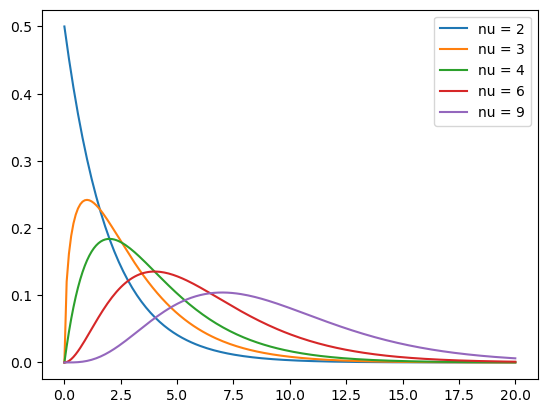

In [5]:
#plt.plot(x, y1, label='nu = 1')
plt.plot(x, y2, label='nu = 2')
plt.plot(x, y3, label='nu = 3')
plt.plot(x, y4, label='nu = 4')
plt.plot(x, y6, label='nu = 6')
plt.plot(x, y9, label='nu = 9')
plt.legend()
plt.show

What do we mean by the distribution of variances of samples taken from a gaussian distribution?  If we drew $\nu$ random numbers {$x_i$} from a gaussian distribution with mean $\mu$ and variance $\sigma^2$, then the following sum: $$Y = \sum_{i=1}^\nu \left( \frac{x_i-\mu}{\sigma} \right )^2 = \sum_{i=1}^\nu Z_i^2$$ follows the $\chi^2$ distribution with $\nu$ degrees of freedom.

You can integrate the PDF to compute the probability that, for example, $\chi^2$ exceeds some value.  e.g., $$p(\chi^2 \ge 9|\nu=5) = \int_9^\infty f(Y|\nu=5) dY = 0.109$$ i.e., if you were to repeat this measurement many times, you will get a $\chi^2 \ge 9$ 10.8% of the time.

In [6]:
# stats.chi2.cdf(x, nu) gives the CDF up to x, so 1 minus that gives you the integral above x
print('p(chi^2 >= 9) = %8.5f' % (1-stats.chi2.cdf(9, 5)))

p(chi^2 >= 9) =  0.10906


Here is a demonstration of **Theorem 1**.

Let $\{x_i\} = x_1, x_2, ..., x_n$ be an indepent and identically distributed (IID) sample from a normal distribution $\mathcal{N}(\mu, \sigma)$.  Let $$Y = \sum_{i=1}^n \left ( \frac{x_i-\mu}{\sigma} \right )^2 = \sum_{i=1}^n Z_i^2,$$ where $Z_i$ are standard random variables.  Then $Y$ has a chi-squared ($\chi^2_n$) distribution with $n$ degrees of freedom.

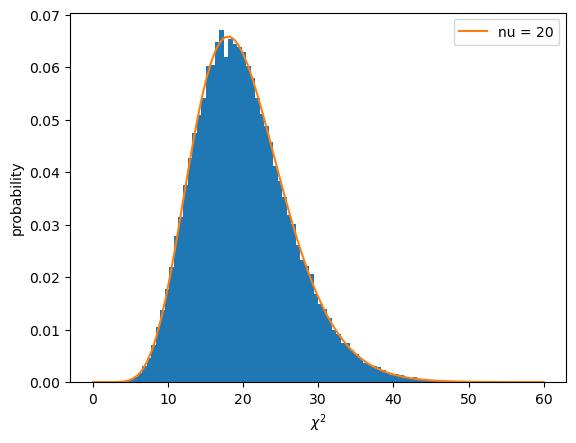

In [7]:
# We will pick a mean and standard deviation for the parent gaussian
# distribution, but the results are independent of these values.
# Try changing them!
mu  = 5.0   # parent population mean
sig = 2.0   # parent population standard deviation

# Let's draw this many random numbers each simulation.
nu  = 20    # degrees of freedom

# and many simulations so we can plot the distribution.
nsims = 100000

chi2vals = np.zeros(nsims)
for i in range(nsims):
    x = np.random.normal(loc=mu, scale=sig, size=nu)
    chi2vals[i] = np.sum(((x-mu)/sig)**2)

# plot the histogram of the nsims realizations
xmax = nu*3  # x axis to 3 times the mean (=nu)
a,b,c = plt.hist(chi2vals, range=[0, xmax], bins=100, density=True)

# and overplot the theoretical chi-squared distribution with
# the same nu degrees of freedom
xgrid = np.linspace(0, xmax, 100)
chi2pdf = stats.chi2.pdf(xgrid, nu)
plt.plot(xgrid, chi2pdf, label='nu = %d' %nu)
plt.xlabel('$\chi^2$')
plt.ylabel('probability')
plt.legend()

Demonstration of the **Example of Theorem 1**.

Given an IID sample $\{x_i\}$ with $n$ elements drawn from an arbitrary distribution with mean $\mu$ and variance $\sigma^2$ with the sample mean given by $$\bar{x} = \frac{1}{n}\sum_i x_i,$$ We saw that the distribution of $\bar{x}$ approaches a gaussian with mean $\mu$ and variance equal to $\sigma^2/n$ or $\mathcal{N}(\mu, \sigma/\sqrt{n})$.  Therefore, the distribution of $$Y = \left( \frac{\bar{x}-\mu}{\sigma/\sqrt{n}} \right)^2$$ follows a chi-squared distribution ($\chi^2_1$) with 1 degree of freedom.

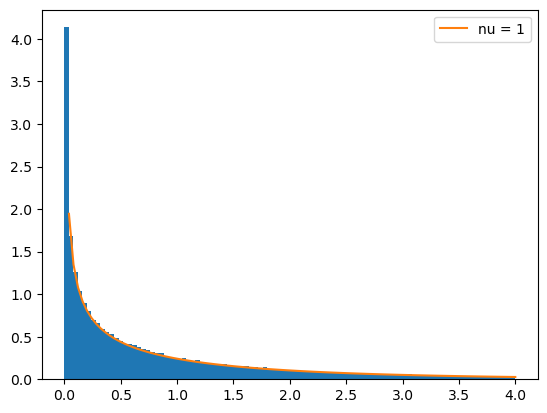

In [8]:
mu  = 5.0
sig = 2.0

nu  = 20    # degrees of freedom

nsims = 100000

chi2vals = np.zeros(nsims)
for i in range(nsims):
    x = np.random.normal(loc=mu, scale=sig, size=nu)
    # this time we want to compute (mean(x)-mu)*sqrt(n)/sigma
    chi2vals[i] = ((np.mean(x)-mu)*np.sqrt(nu)/sig)**2

xmax = nu/5
a,b,c = plt.hist(chi2vals, range=[0, xmax], bins=100, density=True)

# chi-squared distribution with 1 dof
xgrid = np.linspace(0, xmax, 100)
chi2pdf = stats.chi2.pdf(xgrid, 1)
plt.plot(xgrid, chi2pdf, label='nu = 1')
plt.legend()